# Tutorial 2: 10x Visium human dorsolateral prefrontal cortex (DLPFC) datasets

## 1 Import modules

In [1]:
import pandas as pd
import scanpy as sc
import Castl

## 2 Load data and gene lists

In [2]:
adata = sc.read_visium(path='../data/DLPFC/151673', count_file='filtered_feature_bc_matrix.h5')
adata.var_names_make_unique()
adata.obs["x_pixel"] = pd.Series(adata.obsm['spatial'][:, 1], index=adata.obs.index)
adata.obs["y_pixel"] = pd.Series(adata.obsm['spatial'][:, 0], index=adata.obs.index)
sc.pp.log1p(adata)

D:\Apps\Anaconda3\Lib\site-packages\anndata\_core\anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
D:\Apps\Anaconda3\Lib\site-packages\anndata\_core\anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [3]:
methods = ['spatialde', 'spark', 'sparkx', 'somde', 'spagcn', 'spanve', 'heartsvg']
gene_lists = {}

for method in methods:
    file_path = f'../results/DLPFC/151673/DLPFC_151673_{method}_results_processed.csv'
    var_name = f'{method}_genelist'
    gene_lists[var_name] = pd.read_csv(file_path)

locals().update(gene_lists)

In [4]:
methods = ['spatialde', 'spark', 'sparkx', 'somde', 'spagcn', 'spanve', 'heartsvg']
gene_lists = {}

for method in methods:
    file_path = f'../results/DLPFC/151673/151673_stabl/DLPFC_151673_{method}_stabl_processed.csv'
    var_name = f'{method}_combined_genelist'
    gene_lists[var_name] = pd.read_csv(file_path)

locals().update(gene_lists)

## 3 Run Castl

### 3.1 Rank aggregation

gene     score  rank  pred
16201   GRIN1  112491.0     1     1
10281     MAG  112368.0     2     1
4535    MEF2C  112362.0     3     1
16831     CCK  112322.0     4     1
15284  CAMK2A  112316.0     5     1

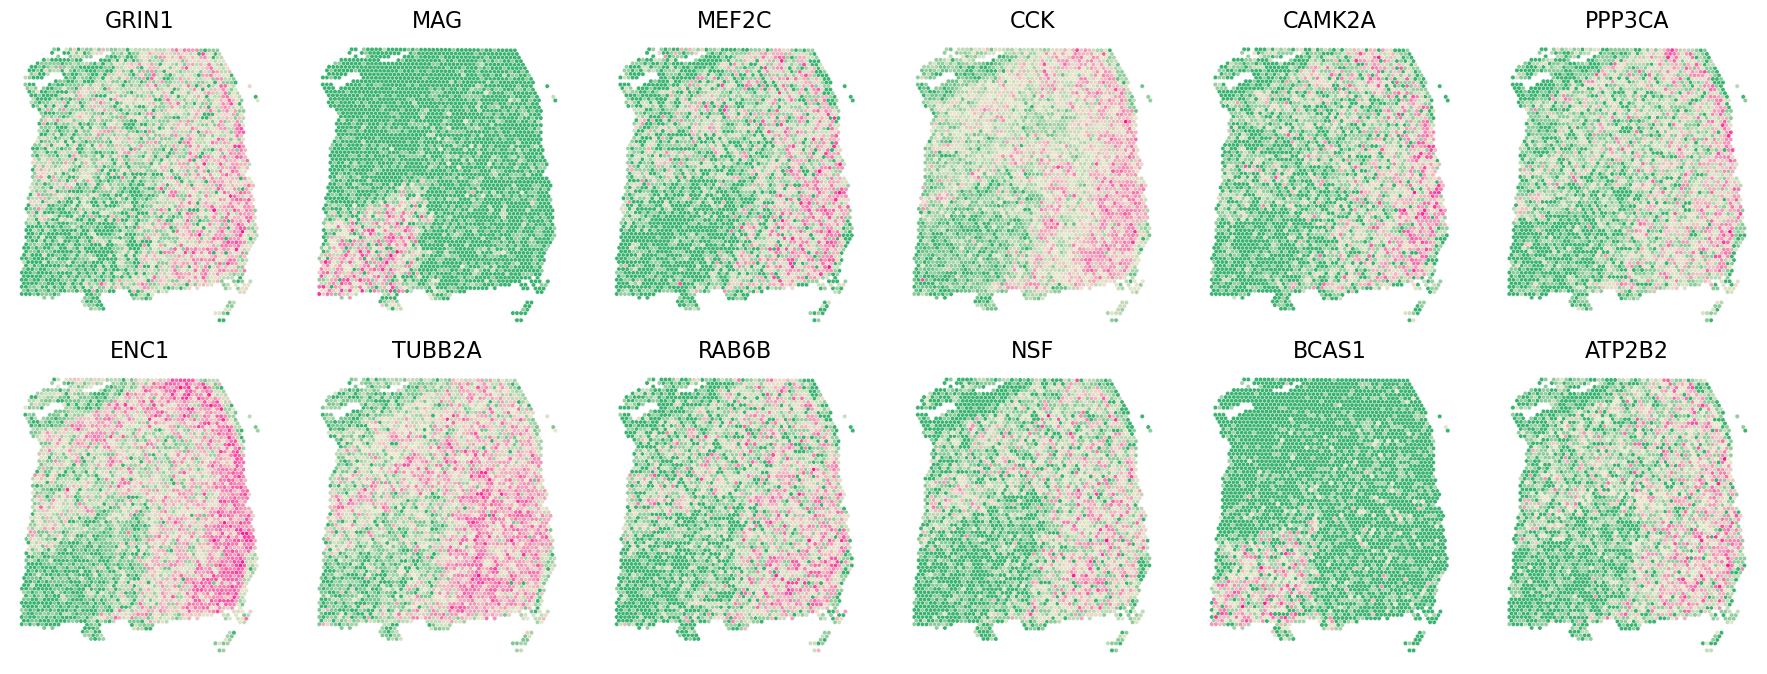

In [5]:
rank_agg_genelist = Castl.rank_agg(
    gene_list=[spatialde_genelist, spark_genelist, sparkx_genelist, 
               somde_genelist, spagcn_genelist, spanve_genelist, heartsvg_genelist],
    gene_col='gene',
    rank_col='adjusted_p_value',
    ascending=True,
    top_percent=0.1
)

Castl.plot_gene(
    adata=adata,
    gene_df=rank_agg_genelist,
    x_col='y_pixel',
    y_col='x_pixel',
    gene_col='gene',
    sort_col='score',
    ascending=False,
    top_n=12,
    spotsize=10,
    figsize=(18, 6.8),
    invert_yaxis=True
)

rank_agg_genelist.head()

### 3.2 P-value aggregation

gene  combined_p_value  adjusted_p_value  rank  pred
3882     SUB1               0.0               0.0     1     1
16812   UQCRH               0.0               0.0     2     1
16813  ATP1A3               0.0               0.0     3     1
8815    RPS21               0.0               0.0     4     1
16815   MPRIP               0.0               0.0     5     1

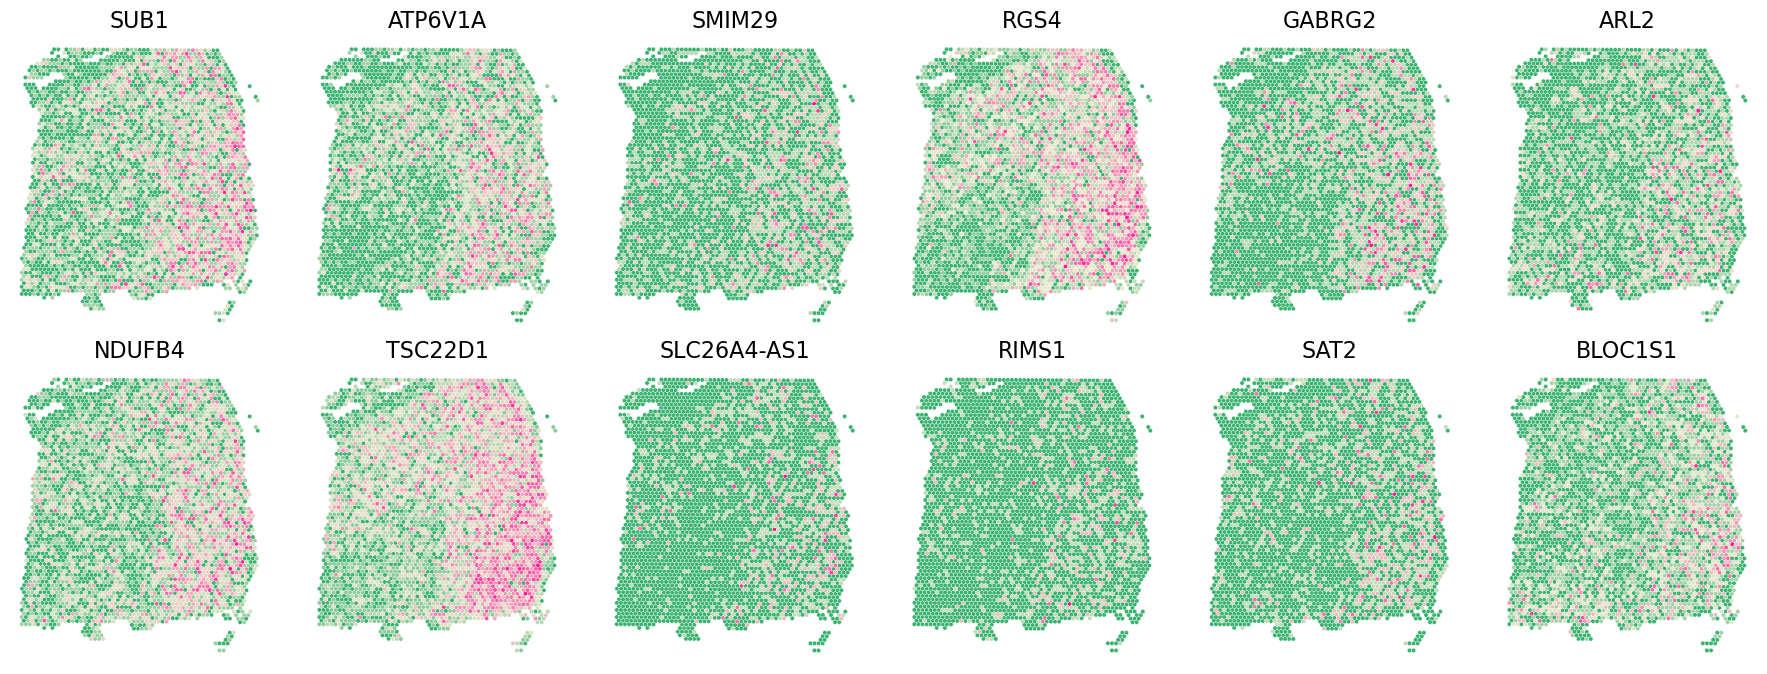

In [6]:
pval_agg_genelist = Castl.pval_agg(
    gene_list=[spatialde_genelist, spark_genelist, sparkx_genelist, 
               somde_genelist, spagcn_genelist, spanve_genelist, heartsvg_genelist],
    gene_col='gene',
    pvalue_col='adjusted_p_value',
    correction='fdr_by'
)

Castl.plot_gene(
    adata=adata,
    gene_df=pval_agg_genelist,
    x_col='y_pixel',
    y_col='x_pixel',
    gene_col='gene',
    sort_col='adjusted_p_value',
    ascending=True,
    top_n=12,
    spotsize=10,
    figsize=(18, 6.8),
    invert_yaxis=True
)

pval_agg_genelist.head()

### 3.3 Stabl aggregation

Optimal threshold: 0.293
Total SVGs selected: 4073
ArtGene count in selection: 0
Non-ArtGene count in selection: 4073


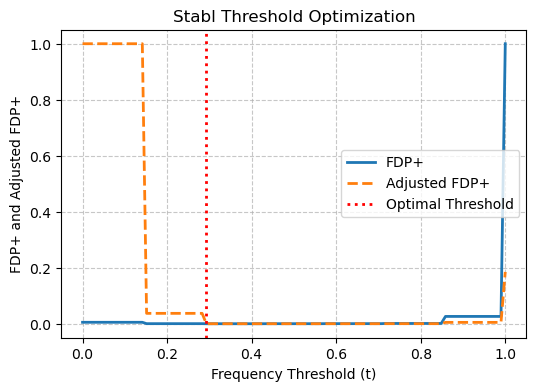

gene  frequency  rank  pred
32527     SCD        1.0     1     1
15231   BCAS1        1.0     2     1
49339  CARNS1        1.0     3     1
43597    APOD        1.0     4     1
7431     PLP1        1.0     5     1

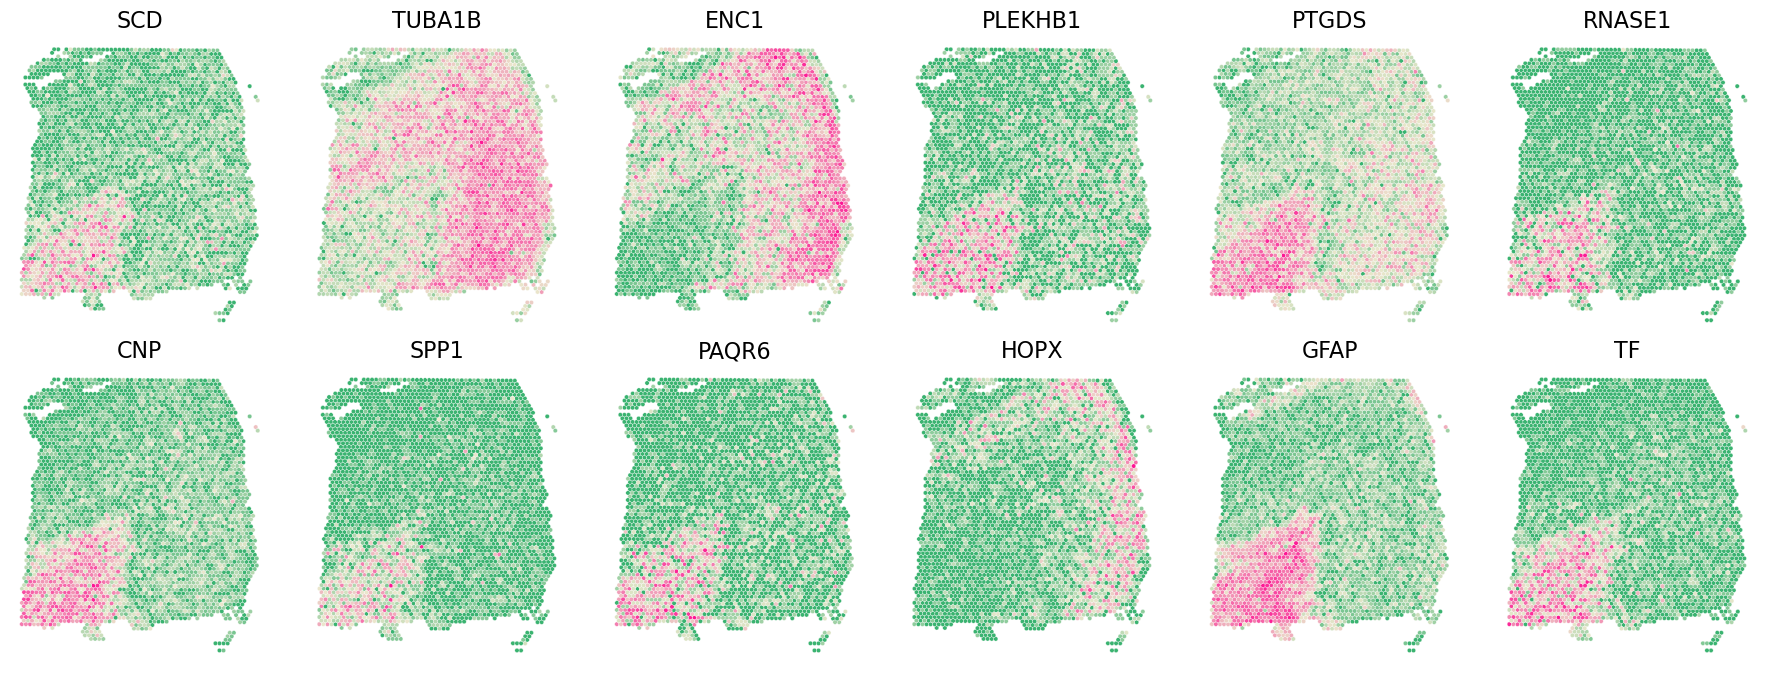

In [7]:
stabl_agg_genelist = Castl.stabl_agg(
    gene_list=[spatialde_combined_genelist, spark_combined_genelist, sparkx_combined_genelist, 
               somde_combined_genelist, spagcn_combined_genelist, spanve_combined_genelist, heartsvg_combined_genelist],
    gene_col = 'gene',
    pred_col = 'pred',
    penalty_factor=0.1,
    plot=True
)

Castl.plot_gene(
    adata=adata,
    gene_df=stabl_agg_genelist,
    x_col='y_pixel',
    y_col='x_pixel',
    gene_col='gene',
    sort_col='frequency',
    ascending=False,
    top_n=12,
    spotsize=10,
    figsize=(18, 6.8),
    invert_yaxis=True
)

stabl_agg_genelist.head()

## 4 Calculate Quality Score

The R package `clusterProfiler` was employed to calculate the QS. Below is the complete procedure for executing R code within a Python kernel to compute and plot QS:

In [8]:
%load_ext rpy2.ipython

D:\Apps\Anaconda3\Lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


R[write to console]: 

R[write to console]: 

R[write to console]: castlRUtils package loaded.
Required packages are now available:
- Core packages: dplyr, ggplot2
- Analysis packages: clusterProfiler, org.Hs.eg.db, patchwork, TissueEnrich, SummarizedExperiment
All dependencies are ready to use.



# A tibble: 10 x 19
   method    consistency_1000 consistency_2000 consistency_3000 consistency_4000
   <chr>                <dbl>            <dbl>            <dbl>            <dbl>
 1 SpatialDE            0.904            0.810            0.774            0.771
 2 SPARK                0.739            0.699            0.681            0.680
 3 SPARK-X              0.999            1.00             0.992            0.982
 4 SOMDE                0.777            0.715            0.650            0.601
 5 SpaGCN               0.164            0.149            0.149            0.149
 6 Spanve               0.937            0.889            0.823            0.753
 7 HeartSVG             0.748            0.620            0.650            0.576
 8 Rank Agg~            0.899            0.858            0.836            0.809
 9 P-value ~            0.888            0.813            0.755            0.732
10 Stabl Ag~            0.998            0.997            0.982            0.986
# i 14 m

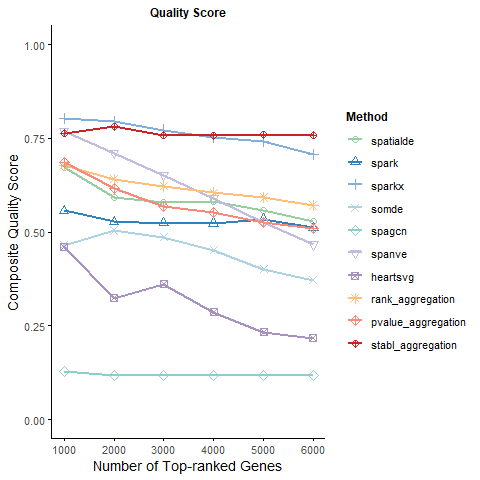

In [9]:
%%R
library(castlRUtils)

methods <- c("spatialde", "spark", "sparkx", "somde", "spagcn",
             "spanve", "heartsvg", "rank_aggregation", 
             "pvalue_aggregation", "stabl_aggregation")
sample_ids <- c("151507", "151508", "151509", "151510",
                "151669", "151670", "151671", "151672", 
                "151673", "151674", "151675", "151676")
combined_df <- load_data(sample_ids, methods)

colors <- c("#97ce9f", "#3480b8", "#82afda", "#add3e2", "#8dcec8",
            "#c2bdde", "#a791c1", "#ffbe7a", "#fa8878", "#c82423")
labels <- c('SpatialDE', 'SPARK', 'SPARK-X', 'SOMDE', 'SpaGCN', 
            'Spanve', 'HeartSVG', 'Rank Aggregation', 'P-value Aggregation', 'Stabl Aggregation')
results <- calculate_qs(
  gene_list = combined_df,
  sample_ids = sample_ids,
  colors = colors,
  method_labels = labels
)

print(results$key_metrics)
plot(results$plots$quality)